In [1]:
import warnings
warnings.simplefilter('ignore')

# 전처리 기능

## 스케일링

스케일링은 자료 집합에 적용되는 전처리 과정으로 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.스케일링은 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지하고 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상시킨다.

Scikit-Learn에서는 스케일링을 위한 함수와 클래스를 각각 제공한다. 스케일링 함수는 다음과 같다.

* `scale(X)`: 기본 스케일. 평균과 표준편차 사용
* `robust_scale(X)`: 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
* `minmax_scale(X)`: 최대/최소값이 각각 1, 0이 되도록 스케일링
* `maxabs_scale(X)`: 최대절대값과 0이 각각 1, 0이 되도록 스케일링

In [2]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
x = np.vstack([x, [20]])  # outlier
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [5.84333333 3.054      3.75866667 1.19866667]
old std:  [0.82530129 0.43214658 1.75852918 0.76061262]
new mean: [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
new std:  [1. 1. 1. 1.]


만약 파이프라인을 이용하면 스케일링을 함수가 아닌 Scaler 클래스로 구현해야 한다. `scale` 함수에 대응하는 클래스는 `StandardScaler` 클래스이다.

Scaler 클래스의 사용 방법은 다음과 같다.

1. 클래스 객체 생성
2. `fit()` 메서드와 트레이닝 데이터를 사용하여 변환 계수 추정
3. `transform()` 메서드를 사용하여 실제로 자료를 변환

또는 `fit_transform()` 메서드를 사용하여 계수 추정과 자료 변환을 동시에 실행할 수도 있다.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

data1.std(), data2.std()

(1.974000985027335, 1.0)

## 정규화 (Normalization)

정규화(Normarlization)는 스케일링과 달리 개별 데이터의 크기를 모두 같게 만들기 위한 변환이다. 따라서 개별 데이터에 대해 서로 다른 변환 계수가 적용된다.

정규화는 다차원 독립 변수 벡터가 있을 때 각 벡터 원소들의 **상대적 크기만** 중요한 경우에 사용된다.

In [5]:
from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [2. 1. 0. 1. 2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [1. 1. 1. 1. 1.]


In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:2]
data3 = normalize(data1)

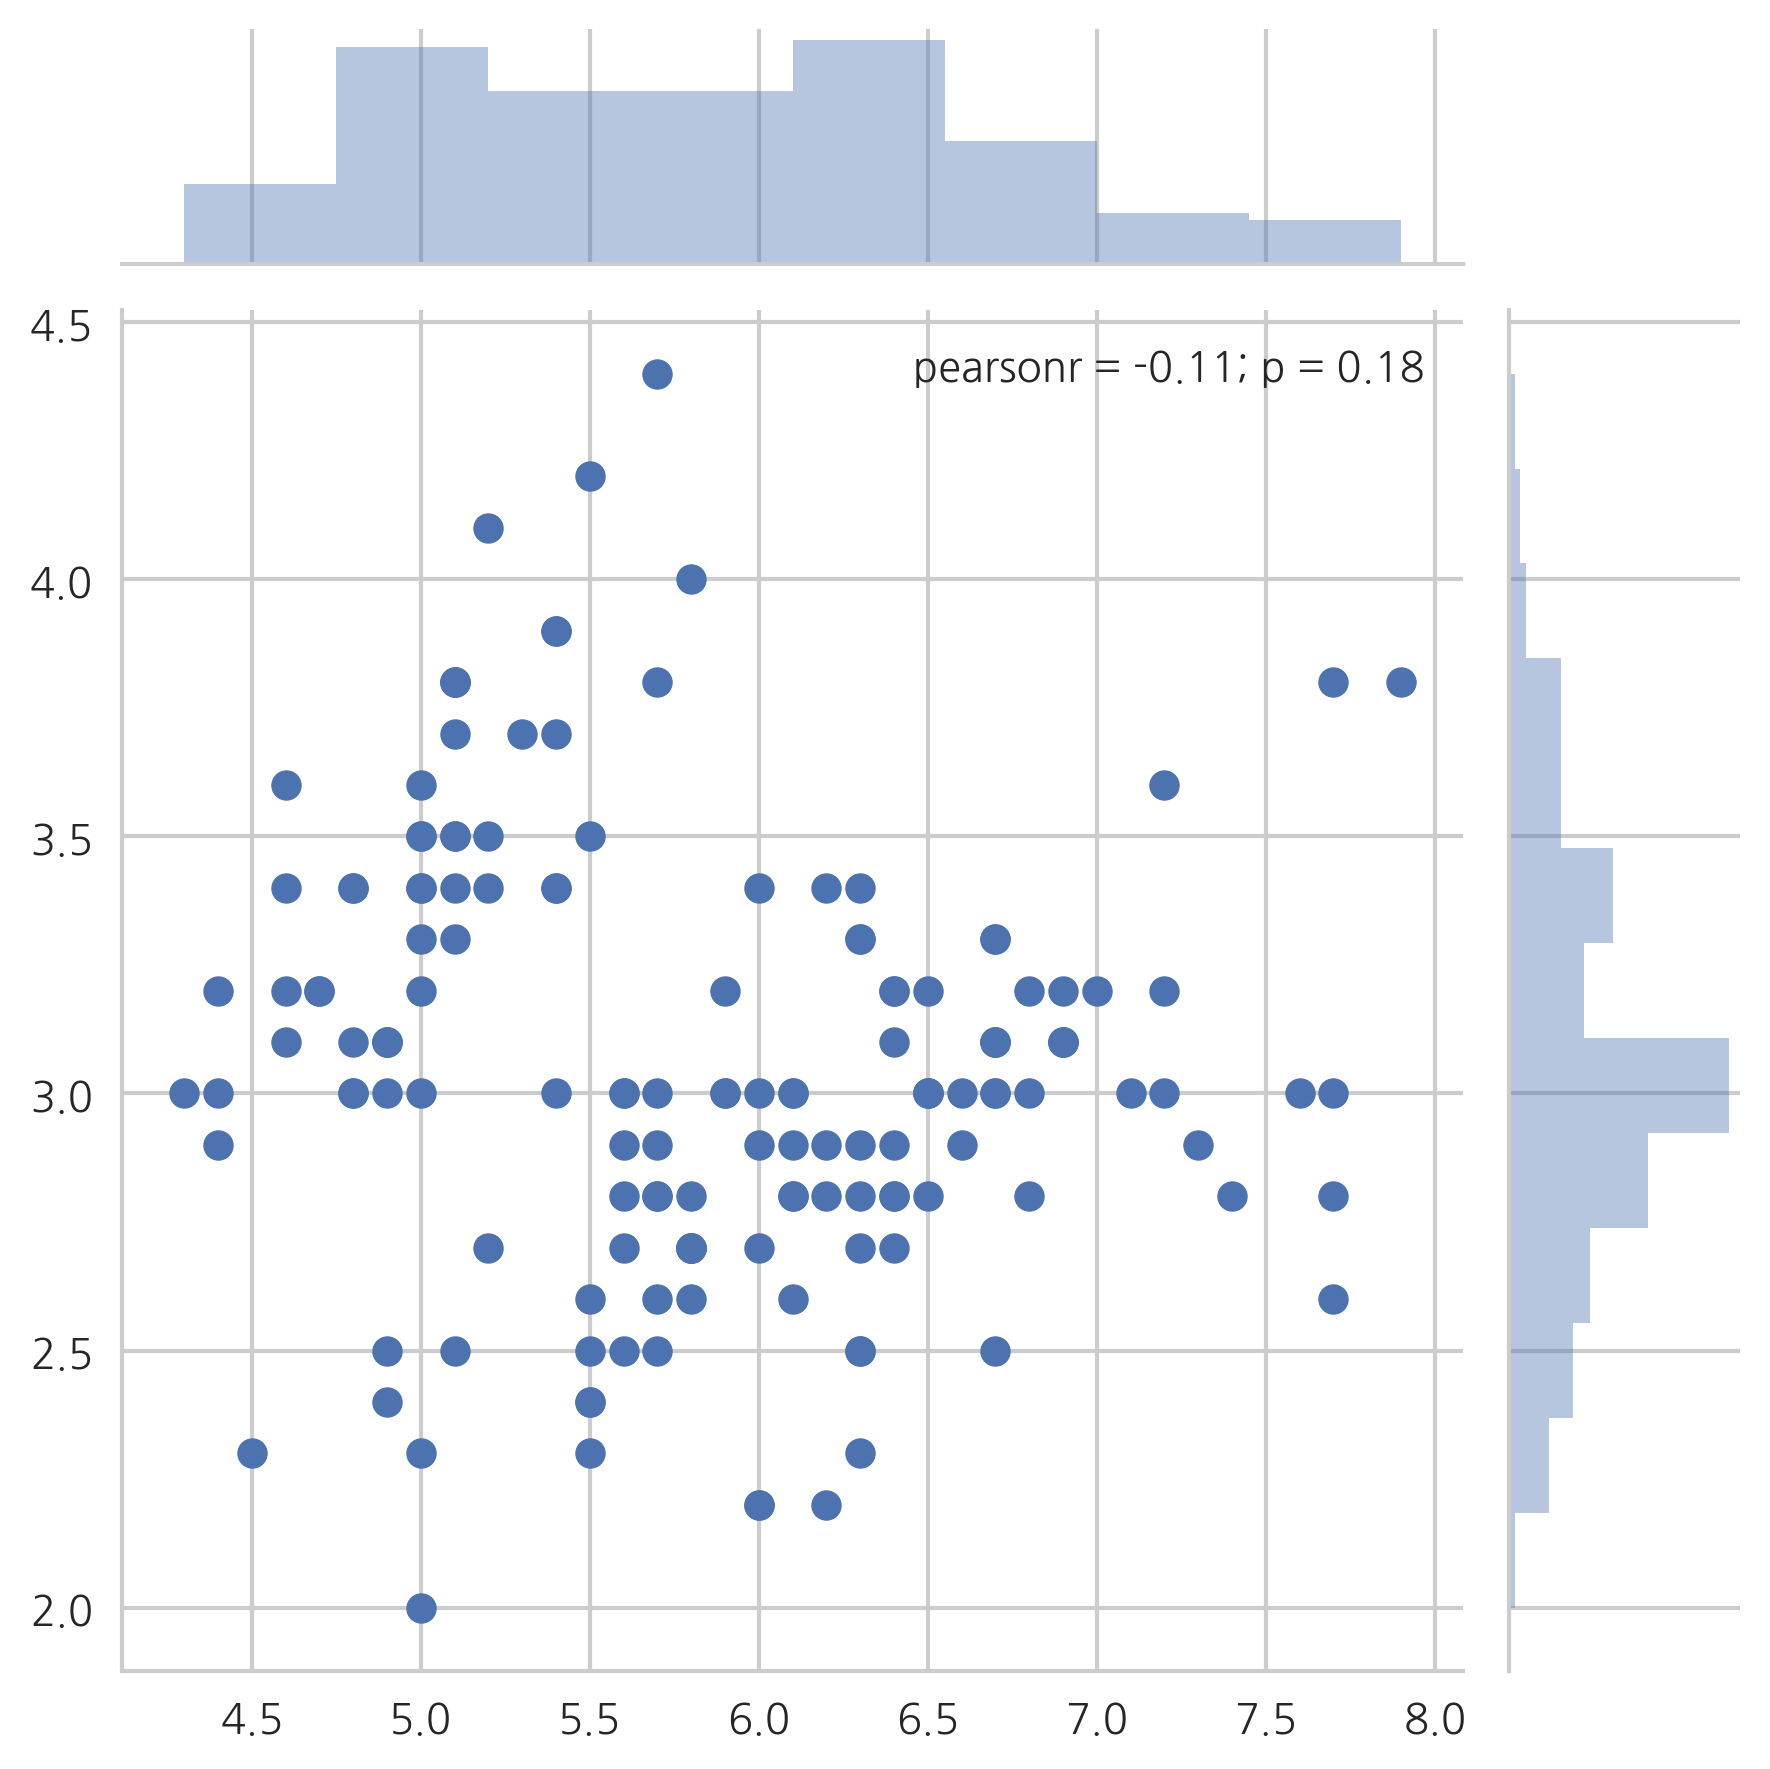

In [7]:
sns.jointplot(data1[:,0], data1[:,1])
plt.show()

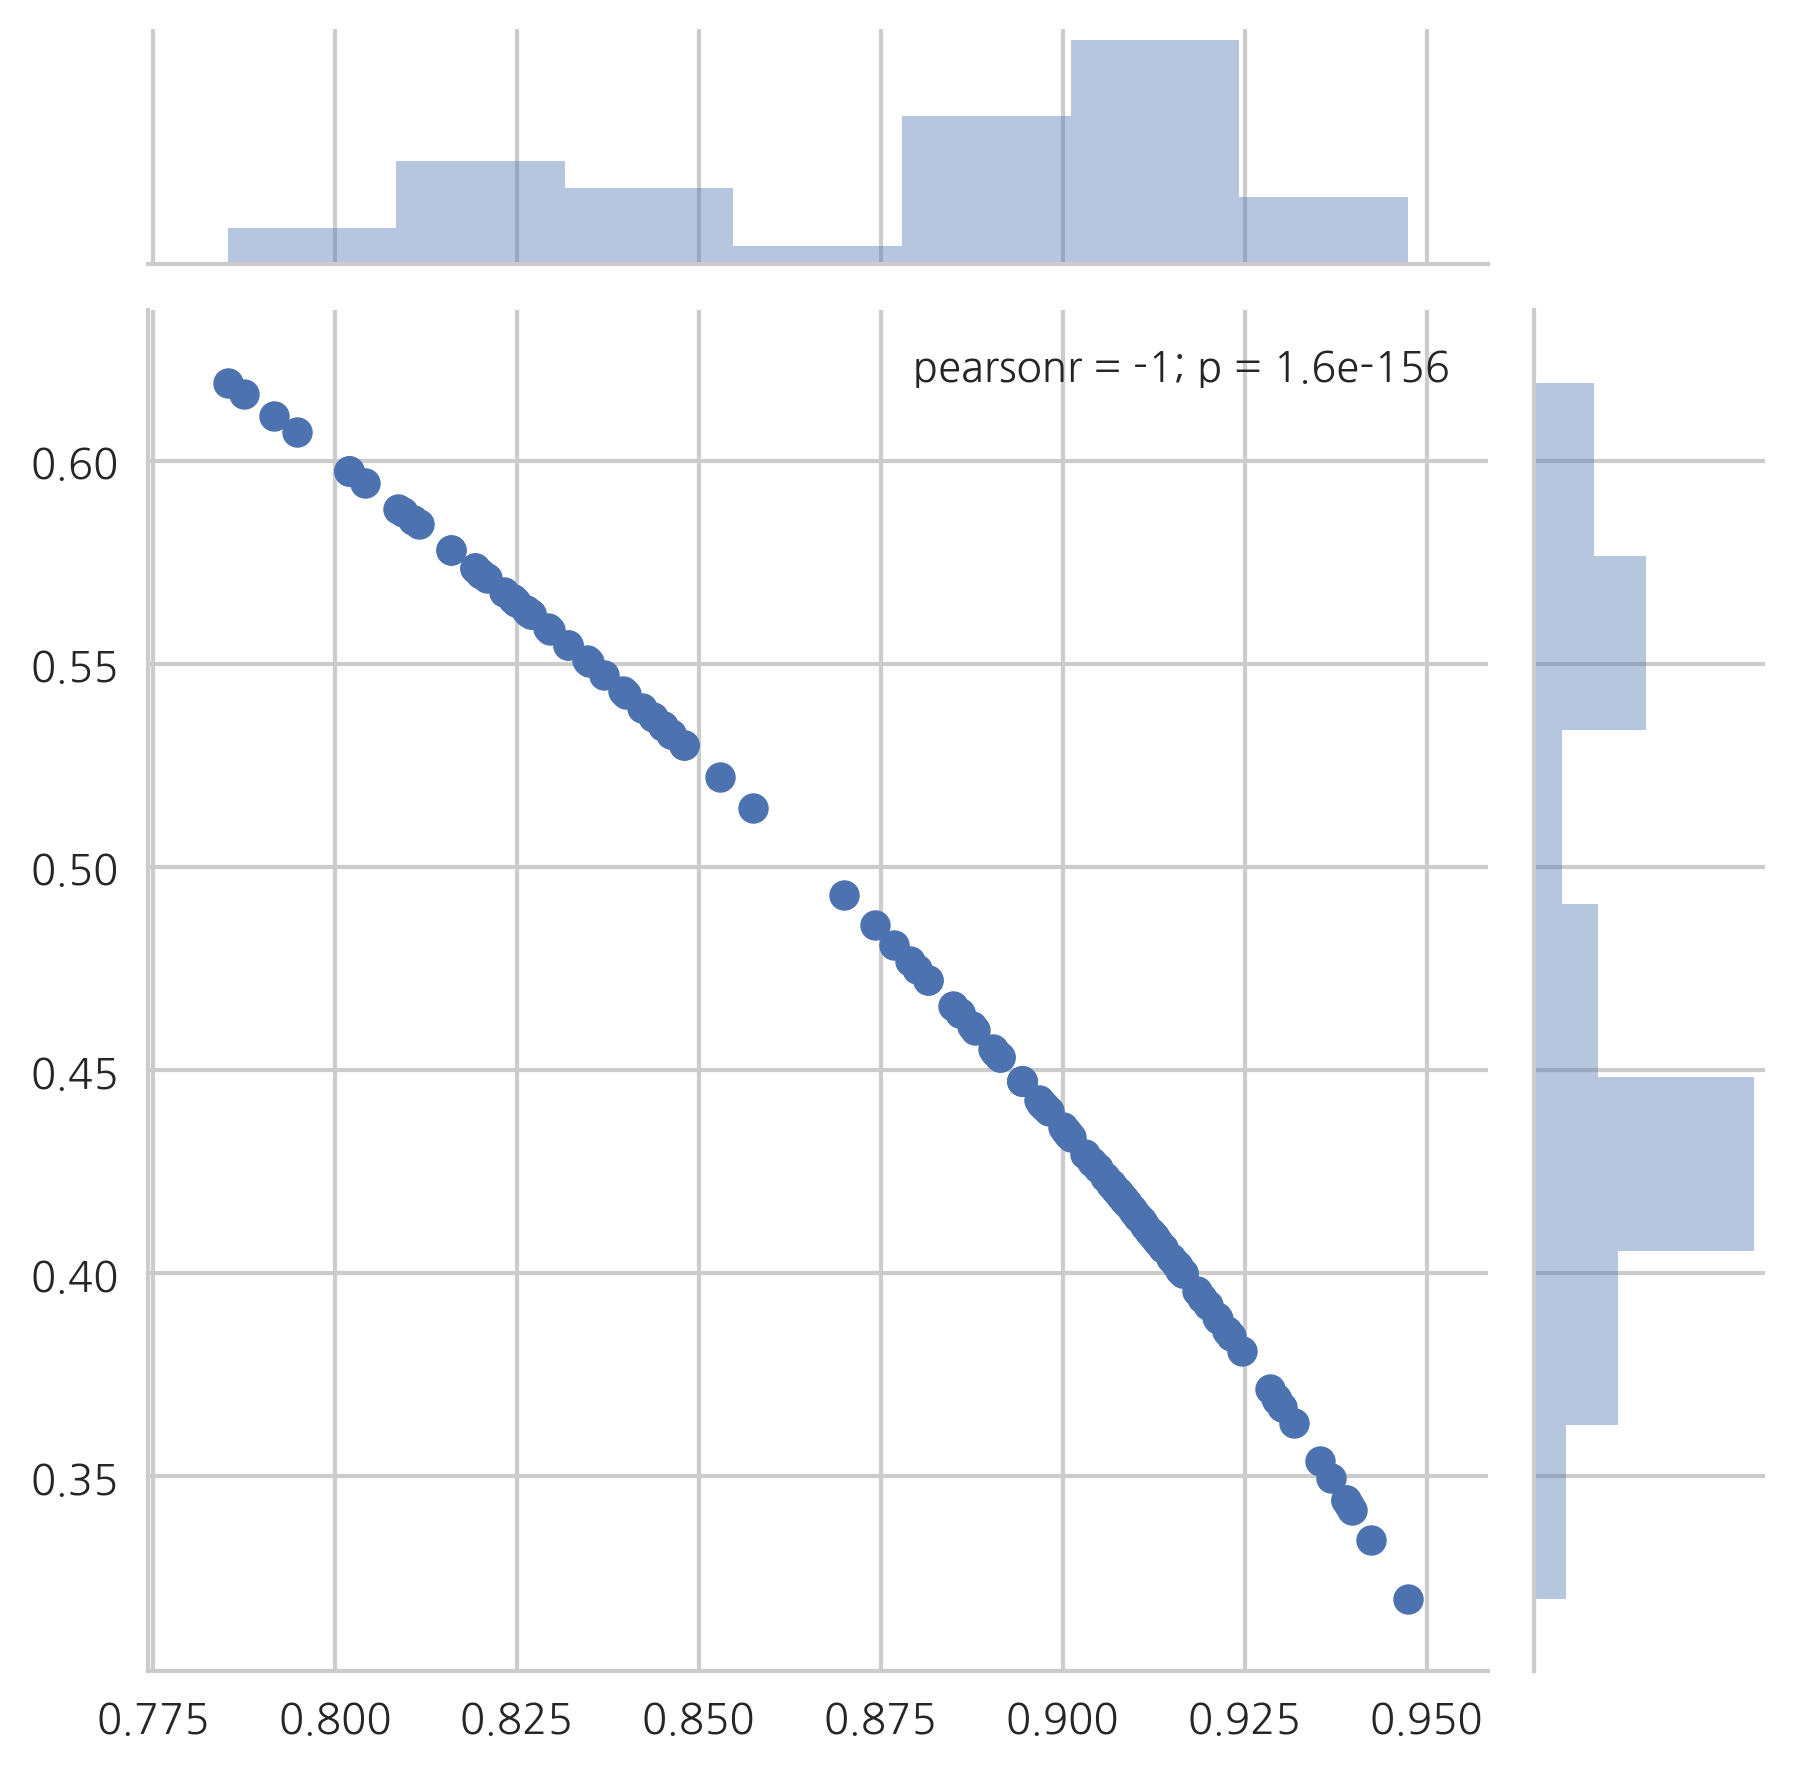

In [8]:
sns.jointplot(data3[:,0], data3[:,1])
plt.show()

## 인코딩(Encoding)

인코딩은 카테고리 값이나 텍스트 정보를 처리가 쉬운 정수로 변환하는 과정이다. 

### One-Hot-Encoder

One-Hot-Encoder는 one-of-K 인코딩이라고도 불리며 0 ~ K-1 의 값을 가지는 정수 스칼라값을 0 또는 1 값을 가지는 K-차원 벡터로 변환한다.
만약 입력이 스칼라가 아니라 벡터이면 각 원소에 대해 인코딩된 결과를 모두 연결한다. 각 원소의 위치 정보는 `feature_indices_` 속성에 저장된다.
또 입력이 벡터인 경우에 특정한 열만 카테고리 값이면 `categorical_features` 인수를 사용하여 인코딩이 되지 않도록 지정할 수 있다. 이 때 인코딩 결과의 순서가 바뀔 수 있으므로 주의한다.

`fit` 메서드를 호출하면 다음과 같은 속성이 지정된다.

* `n_values_` : 각 변수의 최대 클래스 갯수
* `feature_indices_` : 입력이 벡터인 경우 각 원소를 나타내는 슬라이싱(slice) 정보
* `active_features_` : 실제로 사용된 클래스 번호의 리스트

One-Hot-Encoding 결과는 메모리 절약을 위해 스파스 행렬(sparse matrix) 형식으로 출력된다. 일반적인 배열로 바꾸려면 `toarray` 메서드를 사용한다.

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [10]:
X = np.array([[0], [1], [2]])
X

array([[0],
       [1],
       [2]])

In [11]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

In [12]:
ohe.transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [13]:
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 
X

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [14]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2, 3, 5]), array([ 0,  2,  5, 10]), array([0, 1, 2, 3, 4, 5, 6, 7, 9]))

In [15]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

In [16]:
ohe = OneHotEncoder(categorical_features=[False, True, False])
ohe.fit_transform(X).toarray()

array([[1., 0., 0., 0., 4.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 2.]])

In [17]:
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

### Imputer

Imputer는 누락된 정보를 채우는 변환이다. 다음과 같은 인수를 제공한다.

* `missing_values` : 누락 정보
* `strategy` : 채우는 방법. 디폴트는 "mean"
  * "mean": 평균
  * "median": 중앙값
  * "most_frequent": 최빈값

In [18]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit_transform([[1, 2], [np.nan, 3], [7, 6]])

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

### Binarizer

Binarizer는 기준값(threshold)값을 기준으로 결과를 0, 1로 구분한다. 디폴트 기준값은 0 이다.

In [19]:
from sklearn.preprocessing import Binarizer
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
binarizer = Binarizer().fit(X) 
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [20]:
binarizer = Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

### PolynomialFeatures

PolynomialFeatures 입력값 $x$를 다항식으로 변환한다.

$$ x \;\; \rightarrow \;\; [ 1, x, x^2, x^3, \cdots ] $$

만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.

$$ [x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1^2, x_2^2, x_1x_2 ] $$

다음과 같은 입력 인수를 가진다.

* `degree` : 차수
* `interaction_only`: interaction 항 생성 여부
* `include_bias` : 상수항 생성 여부


In [21]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [22]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [23]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

### FunctionTransformer

FunctionTransformer 입력값 $x$를 다항식이 아닌 사용자가 원하는 함수를 사용하여 변환한다.

$$ x \;\; \rightarrow \;\; [ f_1(x),  f_2(x),  f_3(x),  \cdots ] $$

In [24]:
from sklearn.preprocessing import FunctionTransformer

def kernel(X):
    x0 = X[:, :1]
    x1 = X[:, 1:2]
    x2 = X[:, 2:3]
    X_new = np.hstack([x0, 2 * x1, x2 ** 2, np.log(x1)])
    return X_new

In [25]:
X = np.arange(12).reshape(4, 3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [26]:
kernel(X)

array([[  0.        ,   2.        ,   4.        ,   0.        ],
       [  3.        ,   8.        ,  25.        ,   1.38629436],
       [  6.        ,  14.        ,  64.        ,   1.94591015],
       [  9.        ,  20.        , 121.        ,   2.30258509]])

In [27]:
FunctionTransformer(kernel).fit_transform(X)

array([[  0.        ,   2.        ,   4.        ,   0.        ],
       [  3.        ,   8.        ,  25.        ,   1.38629436],
       [  6.        ,  14.        ,  64.        ,   1.94591015],
       [  9.        ,  20.        , 121.        ,   2.30258509]])

### Label Encoder

Label Encoder는 독립 변수가 아닌 종속 변수(라벨)에 대해 사용한다. 문자열이나 정수로된 라벨 값을 $0$ ~ $K-1$까지의 정수로 변환한다. 변환된 규칙은 `classes_` 속성에서 확인할 수 있다. 예측 결과에 적용할 수 있도록 역변환을 위한 `inverse_transform` 메서드도 지원한다.

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
le.fit(y)
le.classes_

array(['A', 'B', 'C'], dtype='<U1')

In [29]:
y2 = le.transform(y) 
y2

array([0, 1, 0, 0, 1, 2, 2, 0, 2, 1])

In [30]:
le.inverse_transform(y2)

array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'], dtype='<U1')

### Label Binarizer

Label Binarizer는 one-hot-encoder와 유사하지만 독립 변수가 아닌 종속 변수(라벨) 값을 인코딩하는데 사용한다.
Label Encoder와 마찬가지로 인코딩된 값에서 도로 라벨값으로 변환하는 역변환이 가능하다.

In [31]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
lb.fit(y)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [32]:
lb.classes_

array(['A', 'B', 'C'], dtype='<U1')

In [33]:
y2 = lb.transform(y)
y2

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [34]:
lb.inverse_transform(y2)

array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'], dtype='<U1')